# Retroalimentacion Segundo Parcial (2018-II)
<hr/>

### Primer  Punto
**Determine el polinomio de interpolacion de la funcion $f(x) =x^4 - 1$ en los nodos ${x_0 = 0, x_1=1, x_2=2, x_3=-1}$. Haga esto usando el método de interpolacion de Lagrange**

* (**Nota**: Para esto determine la imagen de cada $x_i$ usando la función dada $f(x)$)

In [10]:
def f(x):
    return pow(x,4.0)-1

def LagrangePol(datos):
    # la funcion LagrangePol crea un objeto que evalua un polinomio
    # en un cierto valor de x
    def L(k, x):  # pol $L_k(x)=\prod\limits_{i \neq k}\frac{x-x_i}{x_k-x_i}$
        out = 1.0
        for i, p in enumerate(datos):
            if i != k:
                out *= (x-p[0])/(datos[k][0]-p[0])
        return out

    def P(x):  # polinomio $P(x)=\sum\limits_{k}f(x_k)L_k(x)$
        lag = 0.0
        for k, p in enumerate(datos):
            lag += p[1]*L(k, x)
        return lag

    return P

xl = [-1,0,1,2]
yl = []
for xi in xl:
    yl.append(f(xi))
datos = []
for xi, yi in zip(xl, yl):
    datos.append([xi,yi])
print('data to be used: ',datos)

P = LagrangePol(datos)

data to be used:  [[-1, 0.0], [0, -1.0], [1, 0.0], [2, 15.0]]


* Aquí realice una visualizacion de la función $f(x)$ y del polinomio  de interpolación resultante $P(x)$ en el intervalo $[-2,2]$. También grafique los puntos considerados para la interpolacion $[(x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3)]$

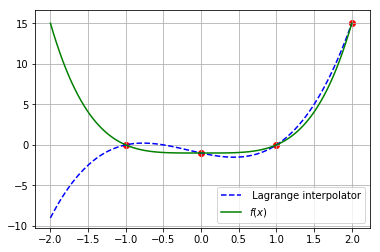

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-2,2,100)
y = np.zeros(np.size(x))
yex = np.zeros(np.size(x))
for i in range(np.size(x)):
    y[i]   = P(x[i])
    yex[i] = f(x[i])
    
plt.plot(x,y,'--b',label=' Lagrange interpolator')
plt.plot(x, yex, 'g', label = r'$f(x)$')
for p in datos:
    plt.scatter(p[0],p[1],c='r')
plt.legend()
plt.grid(True)
plt.show()

### Segundo  Punto
**Utilice un polinomio de interpolacion para obtener una aproximacion de $\sqrt(2)$, siguiendo las siguientes indicaciones:**

* Considere la funcion $f(x) = 2^x$ y los siguientes nodos ${x_0=-2, x_1=-1, x_2=0, x_3=1, x_4=2}$
* Con la informacion anterior construya un polinomio de interpolacion usando el método de Newton. 

In [29]:
def f(x):
    return pow(2.0,x)

def NewtonPol(dat):
    # la funcion NewtonPol crea un objeto que evalua un polinomio en un cierto valor de x
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):  # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1.0
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x-p[0])
        return out

    def P(x):  # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0.0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

xl = [-2,-1,0,1,2]
yl = []
for xi in xl:
    yl.append(f(xi))
datos = []
for xi, yi in zip(xl, yl):
    datos.append([xi,yi])
print('data to be used: ',datos)

T, P = NewtonPol(datos)
import pandas as pd
df = pd.DataFrame(T)
df

data to be used:  [[-2, 0.25], [-1, 0.5], [0, 1.0], [1, 2.0], [2, 4.0]]


,0,1,2,3,4
0,0.25,0.00,0.000,0.000000,0.000000
1,0.50,0.25,0.000,0.000000,0.000000
2,1.00,0.50,0.125,0.000000,0.000000
3,2.00,1.00,0.250,0.041667,0.000000
4,4.00,2.00,0.500,0.083333,0.010417


* Con el polinomio obtenido previamente, piense como usarlo para obtener la aproximacion de $\sqrt(2)$

In [30]:
import math as m
print('aproximacion: {}'.format(P(0.5)))
print('valor real: {}'.format(m.sqrt(2)))

aproximacion: 1.412109375
valor real: 1.4142135623730951


* Relice un gráfico de la funcion $f(x)$ y el polinomio obtenido por el método de Newton. Tambien dibuje un punto que represente el valor real de $\sqrt(2)$ y otro punto que represente la aproximacion obtenida con el polinomio de interpolacion.

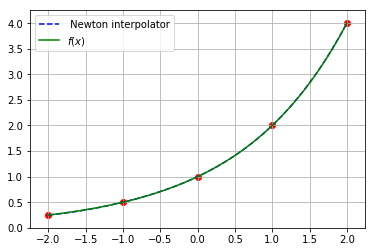

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-2,2,100)
y = np.zeros(np.size(x))
yex = np.zeros(np.size(x))
for i in range(np.size(x)):
    y[i]   = P(x[i])
    yex[i] = f(x[i])
    
plt.plot(x,y,'--b',label=' Newton interpolator')
plt.plot(x, yex, 'g', label = r'$f(x)$')
for p in datos:
    plt.scatter(p[0],p[1],c='r')
plt.legend()
plt.grid(True)
plt.show()